In [30]:
import csv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [31]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [32]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,8.)})
sns.set_style("whitegrid")

In [33]:
df2 = pd.read_csv('data/Ferrovial.csv')
df2

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,10.12.2021,"25,490","25,600","25,790","25,490","431,03K","-0,89%"
1,09.12.2021,"25,720","25,970","25,980","25,710","736,62K","-0,66%"
2,08.12.2021,"25,890","26,250","26,430","25,890","2,26M","-1,48%"
3,07.12.2021,"26,280","26,000","26,420","25,800","1,05M","1,90%"
4,06.12.2021,"25,790","25,730","25,980","25,680","1,30M","1,54%"
...,...,...,...,...,...,...,...
238,08.01.2021,"21,810","21,545","21,967","21,516","3,07M","1,88%"
239,07.01.2021,"21,408","21,800","21,800","21,133","1,36M","-1,36%"
240,06.01.2021,"21,702","21,663","21,840","21,457","1,34M","1,05%"
241,05.01.2021,"21,477","21,565","21,840","21,437","1,13M","-1,44%"


In [34]:
df2["Último"] = df2["Último"].str.replace(",", ".")
df2["Apertura"] = df2["Apertura"].str.replace(",", ".")
df2["Máximo"] = df2["Máximo"].str.replace(",", ".")
df2["Mínimo"] = df2["Mínimo"].str.replace(",", ".")
df2["Vol."] = df2["Vol."].str.replace(",", ".")
df2["% var."] = df2["% var."].str.replace(",", ".")

In [35]:
df2 = df2.astype({"Último" : "float"})

In [36]:
df2 = df2.astype({"Apertura" : "float"})

In [37]:
df2 = df2.astype({"Máximo" : "float"})

In [38]:
df2 = df2.astype({"Mínimo" : "float"})

In [39]:
def astype_vol(x):
    try:
        return float(x) 
    except: 
        return np.nan

In [40]:
df2.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,10.12.2021,25.49,25.60,25.79,25.49,431.03K,-0.89%
1,09.12.2021,25.72,25.97,25.98,25.71,736.62K,-0.66%
2,08.12.2021,25.89,26.25,26.43,25.89,2.26M,-1.48%
3,07.12.2021,26.28,26.00,26.42,25.80,1.05M,1.90%
4,06.12.2021,25.79,25.73,25.98,25.68,1.30M,1.54%


In [41]:
df2["Vol."] = df2["Vol."].str.replace("K","")
df2["% var."] = df2["% var."].str.replace("%","")

In [42]:
df2["Vol."] = df2["Vol."].apply(astype_vol)

In [43]:
df2["% var."] = df2["% var."].apply(astype_vol)


In [44]:
df2['date'] = pd.to_datetime(df2['Fecha']).dt.date

In [45]:
df2[["Fecha2"]] = df2[["Fecha"]].apply(pd.to_datetime)# ME DESCUADRA LA TABLA

In [46]:
df2.dtypes

Fecha               object
Último             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.               float64
% var.             float64
date                object
Fecha2      datetime64[ns]
dtype: object

In [47]:
df2.head(2)

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.,date,Fecha2
0,10.12.2021,25.49,25.60,25.79,25.49,431.03,-0.89,2021-10-12,2021-10-12
1,09.12.2021,25.72,25.97,25.98,25.71,736.62,-0.66,2021-09-12,2021-09-12


In [ ]:
#df2.yea

In [48]:
def month(x):
    return x.split('.')[1]
def year(x):
    return x.split('.')[2]

In [49]:
df2['month'] = df2['Fecha'].apply(month)
df2['year'] = df2['Fecha'].apply(year)

In [50]:
empresax = pd.DataFrame(df2.groupby(["year", "month"])["Apertura"].mean()).reset_index()

In [51]:
empresax.head()

,year,month,Apertura
0,2021,01,20.753500
1,2021,02,20.350300
2,2021,03,21.319261
3,2021,04,22.012850
4,2021,05,23.962571


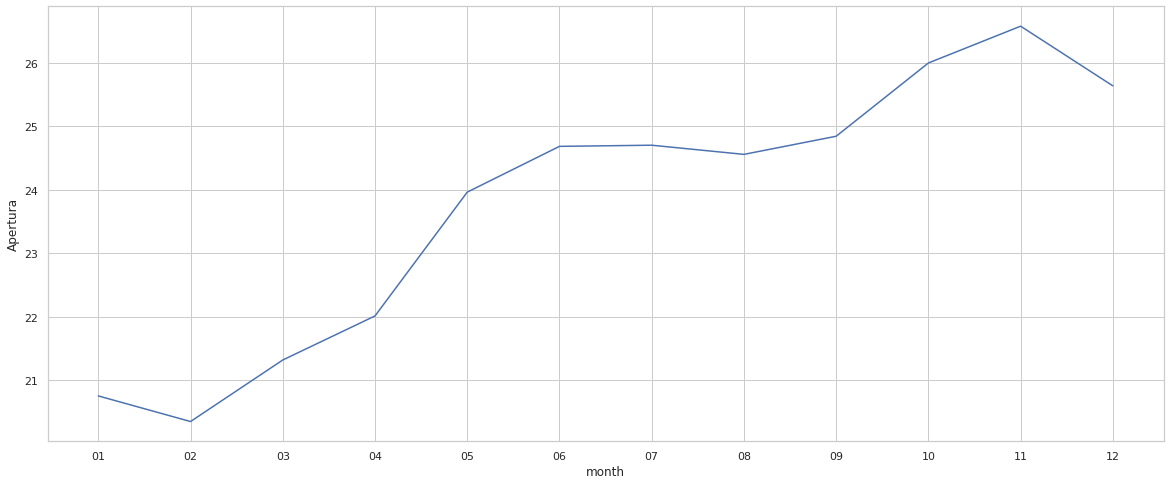

In [52]:
sns.lineplot(data = empresax, x = "month", y = "Apertura");

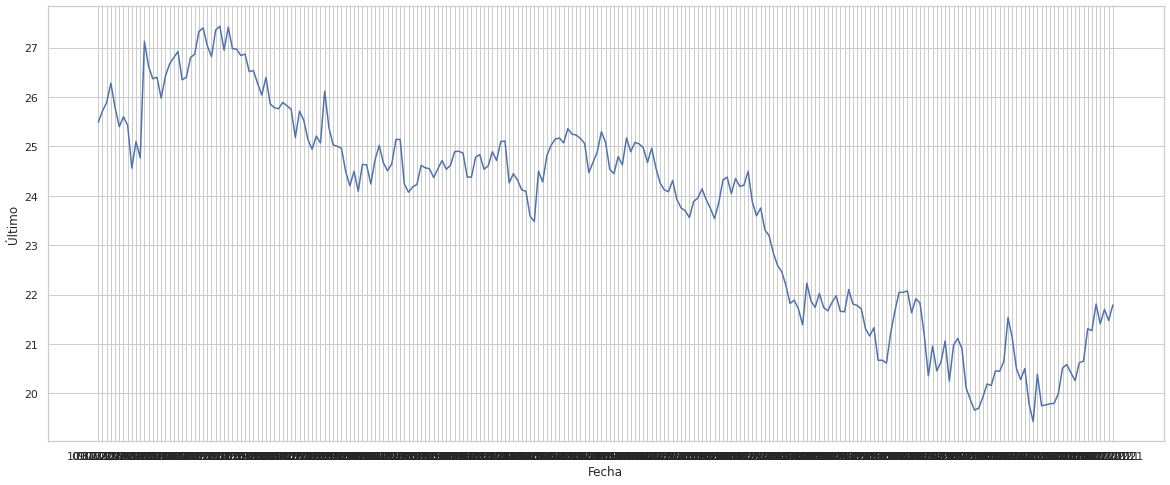

In [53]:
sns.lineplot(data = df2, x = "Fecha", y = "Último");

In [ ]:
#Selector de archivos csv y filtrado por columnas

In [ ]:
with open('data/Acciona.csv') as csvarchivo:
    entrada = csv.DictReader(csvarchivo)
    for reg in entrada:
        print(reg['Último'])

In [ ]:
df = pd.read_csv("data/Acciona.csv", sep=";")


# Cambiando el tipo de dato en fecha
df["Fecha"] = pd.to_datetime(df["Fecha"],format='%Y-%m-%d')



# Creando función
def funcion_graficar(valor):

    #Filtrando el pais
    df_filtrado = df[df["Último"] == valor]
    
    
    if df_filtrado.shape[0] == 0:
        print("Empresa no encontrada!!")
    else:
    # Graficando
        df_filtrado.plot(x ='Fecha', y='Últ.Valor', kind = 'bar')

# Corriendo función que genera la gráfica

pais = input("Ingrese la empresa: ")
funcion_graficar(valor)